<a href="https://colab.research.google.com/github/manoharkaranth/Keras_deployment_to_AWS/blob/master/Malaria_Detection_TL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Notebook content:** Performs image classification of cell images related to Malaria disease, leveraging _VGG19_ model architecture. This notebook fetches the data (images) from Google drive and and stores the model artifacts back to it.


<br/><br/>

In [ ]:
# Import required libraries.
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential

from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input





In [ ]:
# Ignoring warnings.
import warnings
warnings.filterwarnings('ignore')

##### Mounting a drive.


In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount='True')

Mounted at /content/drive


In [ ]:
pwd


'/content'

In [ ]:

IMAGE_SIZE = [224, 224]

train_path = 'drive/My Drive/CNN/Train'
valid_path = 'drive/My Drive/CNN/Test'

##### Downloading VGG19.

In [ ]:
vgg = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


##### Freezing the layers.

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
# useful for getting number of output classes
folders = glob('drive/My Drive/CNN/Train/*')

In [ ]:
folders

['drive/My Drive/CNN/Train/Uninfected', 'drive/My Drive/CNN/Train/Parasitized']

In [ ]:
x = Flatten()(vgg.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)
model = Model(inputs=vgg.input, outputs=prediction)

In [ ]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
# Creating Model from scratch using CNN.
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Using the Image Data Generator to import the images from the dataset.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
training_set = train_datagen.flow_from_directory('drive/My Drive/CNN/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5153 images belonging to 2 classes.


In [ ]:
training_set

In [ ]:
test_set = test_datagen.flow_from_directory('drive/My Drive/CNN/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

#shutil.copy(root_dir, colab_dir)


Found 1079 images belonging to 2 classes.


In [ ]:
training_set

##### Model training.

In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
162/162 [==============================] - 2285s 14s/step - loss: 0.7138 - accuracy: 0.6715 - val_loss: 0.5079 - val_accuracy: 0.7748
Epoch 2/10
162/162 [==============================] - 71s 438ms/step - loss: 0.3182 - accuracy: 0.8979 - val_loss: 0.2331 - val_accuracy: 0.9231
Epoch 3/10
162/162 [==============================] - 70s 435ms/step - loss: 0.2589 - accuracy: 0.9171 - val_loss: 0.3853 - val_accuracy: 0.8406
Epoch 4/10
162/162 [==============================] - 71s 436ms/step - loss: 0.2582 - accuracy: 0.9268 - val_loss: 0.2108 - val_accuracy: 0.9222
Epoch 5/10
162/162 [==============================] - 70s 435ms/step - loss: 0.2254 - accuracy: 0.9325 - val_loss: 0.2179 - val_accuracy: 0.9194
Epoch 6/10
162/162 [==============================] - 71s 436ms/step - loss: 0.2188 - accuracy: 0.9362 - val_loss: 0.1503 - val_accuracy: 0.9527
Epoch 7/10
162/162 [==============================] - 

##### Ploting accuracies and losses.

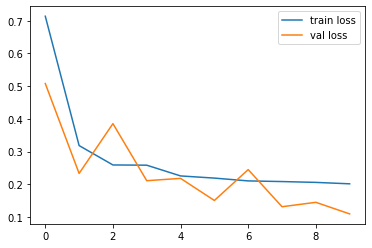

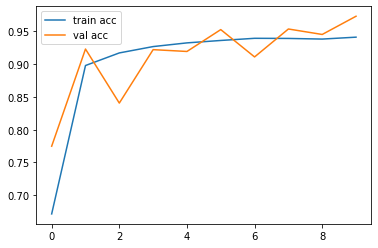

<Figure size 432x288 with 0 Axes>

In [ ]:
# ploting the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# ploting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


##### Saving model artifacts to drive.

In [ ]:
import os
save_path = "drive/My Drive/CNN/"

model.save_weights(os.path.join(save_path,"vgg19_model-weights.h5"))

# save neural network structure to JSON (no weights)
model_json = model.to_json()
with open(os.path.join(save_path,"vgg19_model.json"), "w") as json_file:
    json_file.write(model_json)

In [ ]:
# Saving it as a h5 file (just for reference and will not be used further)
from tensorflow.keras.models import load_model
model.save('vgg19_model.h5')

In [ ]:
y_pred = model.predict(test_set)
y_pred

array([[0.9878505 , 0.01214954],
       [0.03909617, 0.9609038 ],
       [0.01812239, 0.98187757],
       ...,
       [0.02753857, 0.97246146],
       [0.9756783 , 0.02432169],
       [0.9839399 , 0.01606012]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
loss, acc = model.evaluate(test_set, steps=3, verbose=0)

In [ ]:
acc

0.9791666865348816

In [ ]:
test_set.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

#### A quick test before considering the model for deployment.

In [ ]:
model=load_model('vgg19_model.h5')

In [ ]:
img=image.load_img('drive/My Drive/CNN/Test/Parasitized/C33P1thinF_IMG_20150619_114756a_cell_180.png',target_size=(224,224))

In [ ]:

x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/225

In [ ]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

In [ ]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected


###**Notebook's end**